# Librerias

## Instalacion de librerías

In [ ]:
#Instalacion de librerías
## yfinance
!pip install yfinance --upgrade --no-cache-dir

## mplfinance
!pip install mplfinance

##stocksymbol
!pip install stocksymbol --upgrade --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 6.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importación de librerías

In [ ]:
#Se importan las librerías
## Numéricas
import pandas as pd
import numpy as np

## Formato fechas
from datetime import datetime, timedelta

## Gráficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Modelos
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Metricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from scipy import stats
import sklearn.metrics as metrics

Estilos de gráficas

In [ ]:
# Configuración de estilos de matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Carga de datos

In [ ]:
#Se importa la librería de google colab para gestionar archivos
from google.colab import files

In [ ]:
#Se conecta con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ruta donde se tienen los datos
ruta_datos='/content/drive/MyDrive/0_TFM_BD/data/'
ruta_datos_carga=ruta_datos+'saved/'

In [ ]:
#Carga de los datos
df=pd.read_csv(ruta_datos_carga+'df_exp_2020-01-01_2022-01-01.csv')

#Generación del indice como fecha
df['date']=pd.to_datetime(df.date)
df.set_index('date', inplace=True)

#Se copia el df por si es necesario usar el original
df_ori=df.copy()

In [ ]:
df

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


In [ ]:
#Resumen de datos del índice a predecir
num_sesiones=df[['futIBEX']].shape[0]
print("Se disponen de " + str(num_sesiones) + " sesiones para realizar el entrenmiento y validación")
df[['futIBEX']].describe()

Se disponen de 504 sesiones para realizar el entrenmiento y validación


,futIBEX
count,504.000000
mean,8128.926786
std,930.406970
min,6107.200000
25%,7217.600000
50%,8326.100000
75%,8884.900000
max,10083.600000


In [ ]:
#Fechas de los datos de entrenamiento y validacion
date_format='%Y-%m-%d'
fecha_inicial=df.index.min().strftime(date_format)
fecha_final=df.index.max().strftime(date_format)
print("Primera fecha de los datos: ",fecha_inicial)
print("Última fecha de los datos: ",fecha_final)

Primera fecha de los datos:  2020-01-13
Última fecha de los datos:  2021-12-28


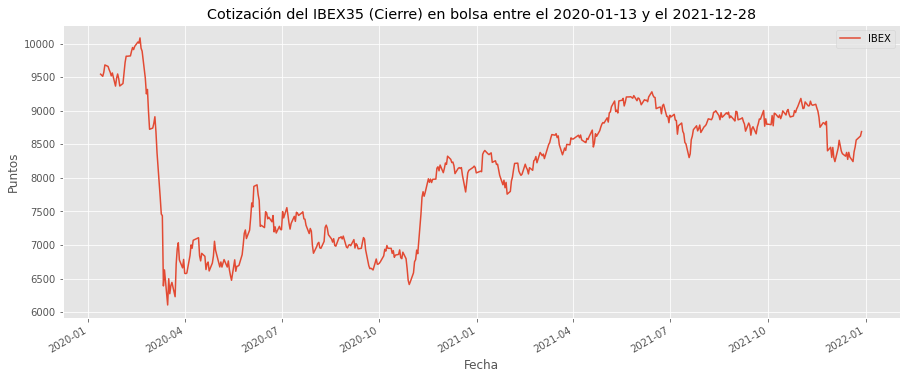

In [ ]:
#Gráfica del IBEX
df[['^IBEX']].plot(figsize=(15,6))
plt.legend(['IBEX'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Cotización del IBEX35 (Cierre) en bolsa entre el '+ str(fecha_inicial) +' y el ' + str(fecha_final));

## Selección de las variables para modelos lineales

En el dataset inicial considerado se contaban con más de 40 variables. Puede que existan relaciones lineales entre ellas que añadan duplicidades a los cálculos y que por tanto no beneficien los modelos lineales que se generen. Es por ello que, para estos modelos, se emplearán métodos de selección estadísticos entre las variables predictoras consideradas en el ejercicion de carga, limpieza y exploración de datos.

Se visualizan las columnas de variables que se disponen

In [ ]:
#Observo las variables
df.columns

Index(['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', 'flag',
       '^IBEX', 'futIBEX'],
      dtype='object')

La variable objetivo es 'futIBEX' que representa el precio que presenta el IBEX en la siguiente sesión y que es lo que se desea calcular.

La variable 'flag', es una señal de compra o venta. En caso de ser 1, significaría que para la próxima sesión el valor será superior y que por tanto el sistema debería recomendar la compra. Si el próximo día el valor es inferior, debería ser 0 para indicar la no compra. Se usará para evaluar el sistema de predicción, por tanto no deberá tenerse en cuenta para las predicciones.

In [ ]:
df_obs=df[['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif',
       '^IBEX', 'futIBEX']]
df_obs

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,futIBEX
date,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,8563.7


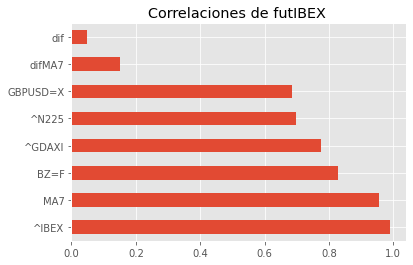

In [ ]:
# Matriz de correlaciones
df_obs=df[['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif',
       '^IBEX', 'futIBEX']]
df_cor = df_obs.corr()

# Grafica de barras de la matriz de correlaciones
data='futIBEX'
(df_cor[data]
    .sort_values(ascending=False)
    .drop(data)
    .plot
    .barh(title=f'Correlaciones de {data} ', grid=True));
plt.show()

Se observa como las variables de diferencia entre sesiones consecutivas y entre la media móvil de 7 días y el valor actual no parecen tener correlación con el valor futuro del IBEX. Se tendrá en cuenta por si en un futuro se replantea seleccionar otro conjunto de variables predictoras.

### Selección de variables mediante métodos estadísticos

Para evitar la multicolinealidad se va a emplear el Factor de Inflación de la Varianza (VIF).

Se seleccionarán como variables predictoras aquellas cuyo VIF sea menor o igual a 5

In [ ]:
# Se divide el conjunto en variables predictoras y la variable objetivo:
df_sel=df_obs.copy()
target_label = "futIBEX"
pred_labels = df_sel.columns.to_list()
pred_labels.remove(target_label)


# Construimos el conjunto de datos predictor y el conjunto objetivo:
x_pred = df_sel[pred_labels]
y_target = df_sel[target_label]

#Resumen
print('Las variables predictoras serán: ',pred_labels)
print('Número de variables predictoras actual:',str(len(pred_labels)))

Las variables predictoras serán:  ['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', '^IBEX']
Número de variables predictoras actual: 8


In [ ]:
# Se crea la función para realizar la operaciones del cálculod del VIF
def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))
    
    return result

In [ ]:
#Se calcula el VIF para el conjunto actual de variables predictoras
calculateVIF(x_pred.copy(deep = True)).T.sort_values(by=['VIF'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


,VIF
MA7,inf
difMA7,inf
^IBEX,inf
^GDAXI,13.708280
BZ=F,13.386761
^N225,12.077912
GBPUSD=X,6.712687
dif,1.631992


Se genera una función para realizar el proceso de selección mediante VIF de forma automática

In [ ]:
def selectDataUsingVIF(var_predictoras_df, max_VIF = 5):
    result = var_predictoras_df.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [ ]:
#Se ejecuta el código para localizar las variables sin presencia de multicolinealidad
VIF_table=calculateVIF(selectDataUsingVIF(x_pred))
var_pred=VIF_table.columns.to_list()

#Se muestran valores resumen
print('\n')
print('Las variables predictoras serán: ',var_pred)
print('Número de variables predictoras actual:',str(len(var_pred)))
print('\n')
#Se muestra la gráfica con la tabla de variables y su VIF
VIF_table.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars




Las variables predictoras serán:  ['BZ=F', 'GBPUSD=X', 'difMA7', 'dif', '^IBEX']
Número de variables predictoras actual: 5




,VIF
BZ=F,4.994527
GBPUSD=X,2.932846
difMA7,1.648453
dif,1.618852
^IBEX,3.256189


Se genera el DF con las variables predictores y la objetivo

In [ ]:
#Se genera el dataframe para hacer la predicción
df_t=df[var_pred]
df_t=df_t.join(df[['futIBEX']])
df_t

,BZ=F,GBPUSD=X,difMA7,dif,^IBEX,futIBEX
date,,,,,,
2020-01-13,64.20,1.3046,-65.428571,-29.7,9543.9,9528.3
2020-01-14,64.49,1.2988,-59.985714,-15.6,9528.3,9511.7
2020-01-15,64.00,1.3023,-59.685714,-16.6,9511.7,9572.5
2020-01-16,64.62,1.3041,13.857143,60.8,9572.5,9681.3
2020-01-17,64.85,1.3079,123.700000,108.8,9681.3,9658.8
...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,63.157143,145.1,8387.5,8459.1
2021-12-22,75.29,1.3270,130.857143,71.6,8459.1,8563.7
2021-12-23,76.85,1.3352,215.971429,104.6,8563.7,8563.7


Se comprueban que no existan valores nulos

In [ ]:
df_t.isna().sum()

BZ=F        0
GBPUSD=X    0
difMA7      0
dif         0
^IBEX       0
futIBEX     0
dtype: int64

In [ ]:
df_t.dropna(inplace=True)
df_t.isna().sum()

BZ=F        0
GBPUSD=X    0
difMA7      0
dif         0
^IBEX       0
futIBEX     0
dtype: int64

### Guardado de los datos

Se guarda el dataset por si desean usarse en otras fases

In [ ]:
#Ruta donde guardar los datos
ruta_guardar='/content/drive/MyDrive/0_TFM_BD/data/saved/'
sufijo='_VIF_LR' + '.csv'

df_t.to_csv(ruta_guardar + 'df_t' + sufijo, encoding='utf-8')
print('Datos guardados')

Datos guardados


# Creación de los conjuntos de datos para el entrenamiento y validación

In [ ]:
#Se generan los df para X e y
X=df_t.drop('futIBEX', axis=1)
y=df_t[['futIBEX']]

In [ ]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [ ]:
print('Se disponen de', X.shape[0],'sesiones')
print('Se disponen de', X_train.shape[0],'datos para el entrenamiento')
print('Se disponen de', X_test.shape[0],'datos para la validación')

Se disponen de 504 sesiones
Se disponen de 352 datos para el entrenamiento
Se disponen de 152 datos para la validación


# Regresion Lineal modelo 1

## Preparación de los datos
Al emplear "StatsModels" para realizar la regresión lineal, es necesario preparar los datos añadiendo una constante 1 para todas las filas

In [ ]:
# Preparación de datos para el modelo
X_trains = sm.add_constant(X_train, prepend=True)
X_trains

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX
date,,,,,,
2020-03-25,1.0,27.39,1.1792,561.385714,225.1,6942.4
2020-12-02,1.0,48.25,1.3423,106.214286,80.0,8220.8
2020-12-28,1.0,50.86,1.3572,121.400000,44.1,8155.6
2020-09-02,1.0,44.43,1.3399,-73.185714,40.0,6996.9
2021-04-23,1.0,66.11,1.3840,29.900000,-38.2,8618.6
...,...,...,...,...,...,...
2020-06-02,1.0,39.57,1.2487,368.857143,186.7,7408.1
2021-11-18,1.0,81.24,1.3492,-170.942857,-90.2,8903.2
2021-04-16,1.0,66.77,1.3785,39.400000,41.9,8613.5


## Entrenamiento del modelo de regresión lineal

In [ ]:
#Creación del modelo de regresión lineal
modelo_sm1 = sm.OLS(endog=y_train, exog=X_trains)

# Ajuste del modelo
modelres1 = modelo_sm1.fit()

# Resumen del modelo
print(modelres1.summary())

                            OLS Regression Results                            
Dep. Variable:                futIBEX   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4244.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          5.65e-308
Time:                        17:07:15   Log-Likelihood:                -2176.7
No. Observations:                 352   AIC:                             4365.
Df Residuals:                     346   BIC:                             4389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.1131    231.469      1.089      0.2

Se observa que el modelo tiene un R2 alto (0.984). 

Se aprecia un P-valor elevado para la variable 'GBPUSD=X'

La ayuda indica que es probable que exista multicolinealidad al ser el número de condición elevado. Se considerará su eliminación en otros modelos.

El P-valor en el resto de variables predictoras es menor que 0.05.

## Predicción

### TRAIN

In [ ]:
#Se prepara el dataset de entrenamiento
X_trains

,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX
date,,,,,,
2020-03-25,1.0,27.39,1.1792,561.385714,225.1,6942.4
2020-12-02,1.0,48.25,1.3423,106.214286,80.0,8220.8
2020-12-28,1.0,50.86,1.3572,121.400000,44.1,8155.6
2020-09-02,1.0,44.43,1.3399,-73.185714,40.0,6996.9
2021-04-23,1.0,66.11,1.3840,29.900000,-38.2,8618.6
...,...,...,...,...,...,...
2020-06-02,1.0,39.57,1.2487,368.857143,186.7,7408.1
2021-11-18,1.0,81.24,1.3492,-170.942857,-90.2,8903.2
2021-04-16,1.0,66.77,1.3785,39.400000,41.9,8613.5


In [ ]:
#Se realiza la predicción con el conjunto de entrenamiento
y_pred_m1_train = modelres1.predict(exog = X_trains)
y_pred_m1_train=pd.DataFrame(y_pred_m1_train)
y_pred_m1_train.columns = ['pred']
y_pred_m1_train

,pred
date,
2020-03-25,6957.125101
2020-12-02,8196.314450
2020-12-28,8146.213696
2020-09-02,7009.398525
2021-04-23,8622.781199
...,...
2020-06-02,7413.964662
2021-11-18,8914.049022
2021-04-16,8609.494361


#### Análisis de residuos

In [ ]:
# Análisis de residuos
residuos_train=y_pred_m1_train['pred'] - y_train['futIBEX']
residuos_train

date
2020-03-25    -76.074899
2020-12-02     -4.385550
2020-12-28    -28.586304
2020-09-02      3.398525
2021-04-23    -79.118801
                 ...    
2020-06-02   -212.435338
2021-11-18    160.849022
2021-04-16   -101.905639
2021-07-09    -55.444852
2021-06-16     -1.812231
Length: 352, dtype: float64

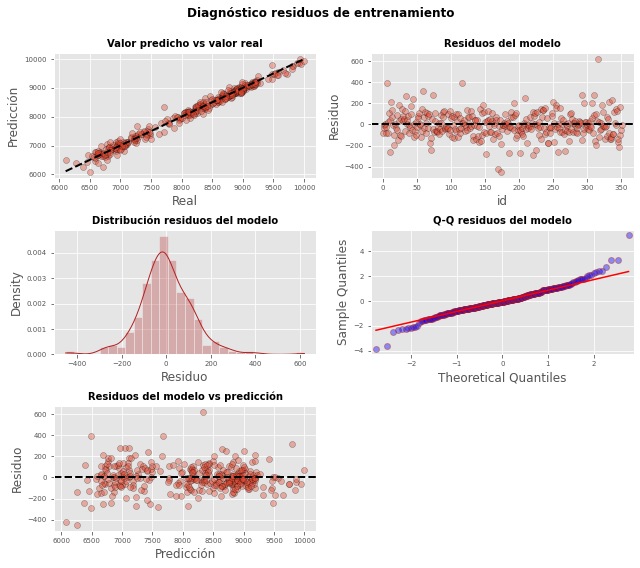

In [ ]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_train, y_pred_m1_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_m1_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de entrenamiento', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [ ]:
#Test de Shapiro
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9649562239646912, pvalue=1.7789699313652818e-07)

In [ ]:
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 39.31590768865492, p-value = 2.9017441656090645e-09


En vista a los resultados del análisis de normalidad, se puede determinar que los residuos tienen una distribución normal.

MAE
MAPE
MSE
RMSE

In [ ]:
#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_train, y_pred_m1_train)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_train, y_pred_m1_train)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_train, y_pred_m1_train)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#
r2 = metrics.r2_score(y_train,y_pred_m1_train)

print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

Resultado de las métricas:
MAE: 85.73
MAPE: 0.01
RMSE 117.3
R2: 0.98


#### Despliegue del modelo

In [ ]:
#Se genera un conjunto de datos 
df_train=pd.merge(X_train[['^IBEX','dif']], y_train, on='date')
df_train=pd.merge(df_train, df['flag'], on='date')
df_train=pd.merge(df_train, y_pred_m1_train, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_train['preddif']=round(df_train['pred']-df_train['^IBEX'],2)

#Se calculan las señales de compra
df_train.loc[df_train['preddif'] >= 0, 'predflag'] = 1 
df_train.loc[df_train['preddif'] < 0, 'predflag'] = 0
df_train

,^IBEX,dif,futIBEX,flag,pred,preddif,predflag
date,,,,,,,
2020-03-25,6942.4,225.1,7033.2,1.0,6957.125101,14.73,1.0
2020-12-02,8220.8,80.0,8200.7,0.0,8196.314450,-24.49,0.0
2020-12-28,8155.6,44.1,8174.8,1.0,8146.213696,-9.39,0.0
2020-09-02,6996.9,40.0,7006.0,1.0,7009.398525,12.50,1.0
2021-04-23,8618.6,-38.2,8701.9,1.0,8622.781199,4.18,1.0
...,...,...,...,...,...,...,...
2020-06-02,7408.1,186.7,7626.4,1.0,7413.964662,5.86,1.0
2021-11-18,8903.2,-90.2,8753.2,0.0,8914.049022,10.85,1.0
2021-04-16,8613.5,41.9,8711.4,1.0,8609.494361,-4.01,0.0


In [1]:
#Gráfica de los valores reales y los predichos
df_train[['futIBEX', 'pred']].plot(figsize=(15,6))
df_train[['futIBEX', 'pred']].plot(kind='scatter',figsize=(15,6))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Entrenamiento');

NameError: ignored

Medición de los aciertos y fallos basados en el sistema de predicción

In [ ]:
y_true=df_train['flag']
y_pred=df_train['predflag']

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5578947368421052

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5454545454545454

### TEST

In [ ]:
#Se prepara el dataset de test
X_tests = sm.add_constant(X_test, prepend=True)
X_tests

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX
date,,,,,,
2021-09-14,1.0,73.60,1.3838,-47.357143,-36.1,8780.0
2021-02-17,1.0,64.34,1.3888,3.385714,-31.0,8122.7
2021-07-12,1.0,75.16,1.3900,-30.200000,40.1,8816.7
2021-11-19,1.0,78.89,1.3500,-296.414286,-150.0,8753.2
2021-09-13,1.0,73.51,1.3841,-34.871429,120.8,8816.1
...,...,...,...,...,...,...
2020-05-22,1.0,35.13,1.2223,67.500000,11.4,6697.5
2020-08-13,1.0,44.96,1.3048,167.200000,-45.5,7250.5
2021-12-27,1.0,78.60,1.3404,247.914286,58.4,8622.1


In [ ]:
#Se realiza la predicción con el conjunto de entrenamiento
y_pred_m1_test = modelres1.predict(exog = X_tests)
y_pred_m1_test=pd.DataFrame(y_pred_m1_test)
y_pred_m1_test.columns = ['pred']
y_pred_m1_test

,pred
date,
2021-09-14,8785.011653
2021-02-17,8142.781881
2021-07-12,8814.834388
2021-11-19,8761.744457
2021-09-13,8799.350715
...,...
2020-05-22,6721.048232
2020-08-13,7287.146623
2021-12-27,8661.435716


#### Análisis de residuos

In [ ]:
# Análisis de residuos
residuos_test=y_pred_m1_test['pred'] - y_test['futIBEX']
residuos_test

date
2021-09-14    149.611653
2021-02-17     84.681881
2021-07-12    120.034388
2021-11-19    -59.555543
2021-09-13     19.350715
                 ...    
2020-05-22   -135.751768
2020-08-13    132.846623
2021-12-27    -27.464284
2021-11-10     52.938150
2021-12-10     65.532199
Length: 152, dtype: float64

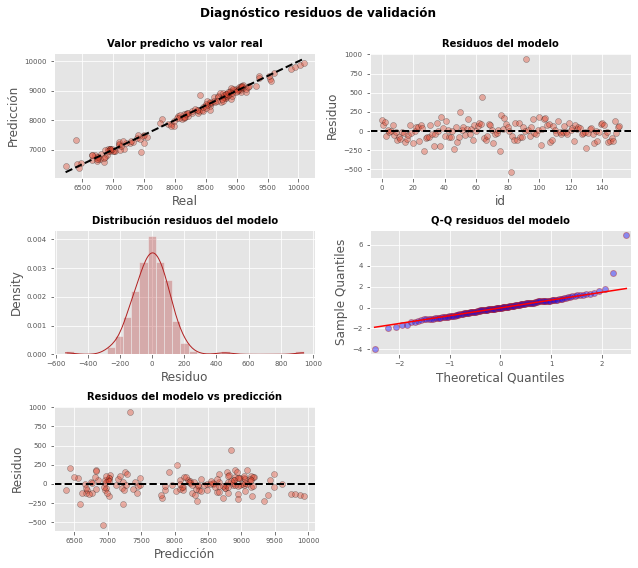

In [ ]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_test, y_pred_m1_test, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_test))), residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_m1_test, residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de validación', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [ ]:
#Test de Shapiro
shapiro_test = stats.shapiro(residuos_test)
shapiro_test

ShapiroResult(statistic=0.8381987810134888, pvalue=1.1564183638457237e-11)

In [ ]:
k2, p_value = stats.normaltest(residuos_test)
print(f"Estadístico= {k2}, p-value = {p_value}")

Estadístico= 96.8888946720296, p-value = 9.137846178719242e-22


En vista a los resultados del análisis de normalidad, se puede determinar que los residuos tienen una distribución normal.

MAE
MAPE
MSE
RMSE

In [ ]:
#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, y_pred_m1_test)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, y_pred_m1_test)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, y_pred_m1_test)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_test,y_pred_m1_test)

print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

Resultado de las métricas:
MAE: 89.93
MAPE: 0.01
RMSE 136.33
R2: 0.98


#### Despliegue del modelo

In [ ]:
#Se genera un conjunto de datos 
df_test=pd.merge(X_test[['^IBEX','dif']], y_test, on='date')
df_test=pd.merge(df_test, df['flag'], on='date')
df_test=pd.merge(df_test, y_pred_m1_test, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_test['preddif']=round(df_test['pred']-df_test['^IBEX'],2)

#Se calculan las señales de compra
df_test.loc[df_test['preddif'] >= 0, 'predflag'] = 1 
df_test.loc[df_test['preddif'] < 0, 'predflag'] = 0
df_test

,^IBEX,dif,futIBEX,flag,pred,preddif,predflag
date,,,,,,,
2021-09-14,8780.0,-36.1,8635.4,0.0,8785.011653,5.01,1.0
2021-02-17,8122.7,-31.0,8058.1,0.0,8142.781881,20.08,1.0
2021-07-12,8816.7,40.1,8694.8,0.0,8814.834388,-1.87,0.0
2021-11-19,8753.2,-150.0,8821.3,1.0,8761.744457,8.54,1.0
2021-09-13,8816.1,120.8,8780.0,0.0,8799.350715,-16.75,0.0
...,...,...,...,...,...,...,...
2020-05-22,6697.5,11.4,6856.8,1.0,6721.048232,23.55,1.0
2020-08-13,7250.5,-45.5,7154.3,0.0,7287.146623,36.65,1.0
2021-12-27,8622.1,58.4,8688.9,1.0,8661.435716,39.34,1.0


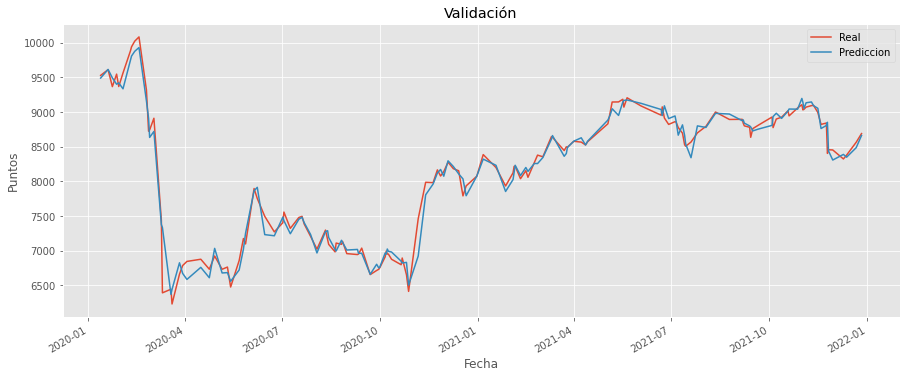

In [ ]:
#Gráfica de los valores reales y los predichos
df_test[['futIBEX', 'pred']].plot(figsize=(15,6))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Validación');

Medición de los aciertos y fallos basados en el sistema de predicción

In [ ]:
y_true=df_test['flag']
y_pred=df_test['predflag']

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5795454545454546

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5460526315789473

## Prueba del modelo predictivo para obtener beneficios

In [ ]:
df_t.columns.to_list()

['BZ=F', 'GBPUSD=X', 'difMA7', 'dif', '^IBEX', 'futIBEX']

In [ ]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=df_t.columns.to_list()
var_pruebas.remove('futIBEX')

#Se genera el conjunto de pruebas
df_pruebas=df[var_pruebas]

#Se añade la constante para statsmodels
df_pruebas=sm.add_constant(df_pruebas, prepend=True)

#Se añaden los datos reales para las señales de compra-venta
df_pruebas=pd.merge(df_pruebas, df[['flag', 'futIBEX']], on='date')

df_pruebas

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX,flag,futIBEX
date,,,,,,,,
2020-01-13,1.0,64.20,1.3046,-65.428571,-29.7,9543.9,0.0,9528.3
2020-01-14,1.0,64.49,1.2988,-59.985714,-15.6,9528.3,0.0,9511.7
2020-01-15,1.0,64.00,1.3023,-59.685714,-16.6,9511.7,1.0,9572.5
2020-01-16,1.0,64.62,1.3041,13.857143,60.8,9572.5,1.0,9681.3
2020-01-17,1.0,64.85,1.3079,123.700000,108.8,9681.3,0.0,9658.8
...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,63.157143,145.1,8387.5,1.0,8459.1
2021-12-22,1.0,75.29,1.3270,130.857143,71.6,8459.1,1.0,8563.7
2021-12-23,1.0,76.85,1.3352,215.971429,104.6,8563.7,1.0,8563.7


In [ ]:
df_pruebas.iloc[:,0:6]

,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX
date,,,,,,
2020-01-13,1.0,64.20,1.3046,-65.428571,-29.7,9543.9
2020-01-14,1.0,64.49,1.2988,-59.985714,-15.6,9528.3
2020-01-15,1.0,64.00,1.3023,-59.685714,-16.6,9511.7
2020-01-16,1.0,64.62,1.3041,13.857143,60.8,9572.5
2020-01-17,1.0,64.85,1.3079,123.700000,108.8,9681.3
...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,63.157143,145.1,8387.5
2021-12-22,1.0,75.29,1.3270,130.857143,71.6,8459.1
2021-12-23,1.0,76.85,1.3352,215.971429,104.6,8563.7


In [ ]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = round(modelres1.predict(exog = df_pruebas.iloc[:,0:6]),2)
df_pruebas

,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX,flag,futIBEX,predIBEX
date,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,-65.428571,-29.7,9543.9,0.0,9528.3,9489.70
2020-01-14,1.0,64.49,1.2988,-59.985714,-15.6,9528.3,0.0,9511.7,9474.07
2020-01-15,1.0,64.00,1.3023,-59.685714,-16.6,9511.7,1.0,9572.5,9457.37
2020-01-16,1.0,64.62,1.3041,13.857143,60.8,9572.5,1.0,9681.3,9513.46
2020-01-17,1.0,64.85,1.3079,123.700000,108.8,9681.3,0.0,9658.8,9621.97
...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,63.157143,145.1,8387.5,1.0,8459.1,8398.00
2021-12-22,1.0,75.29,1.3270,130.857143,71.6,8459.1,1.0,8563.7,8485.61
2021-12-23,1.0,76.85,1.3352,215.971429,104.6,8563.7,1.0,8563.7,8592.62


In [ ]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['futIBEX']),2)
df_pruebas

,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif
date,,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,-65.428571,-29.7,9543.9,0.0,9528.3,9489.70,-38.60
2020-01-14,1.0,64.49,1.2988,-59.985714,-15.6,9528.3,0.0,9511.7,9474.07,-37.63
2020-01-15,1.0,64.00,1.3023,-59.685714,-16.6,9511.7,1.0,9572.5,9457.37,-115.13
2020-01-16,1.0,64.62,1.3041,13.857143,60.8,9572.5,1.0,9681.3,9513.46,-167.84
2020-01-17,1.0,64.85,1.3079,123.700000,108.8,9681.3,0.0,9658.8,9621.97,-36.83
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,63.157143,145.1,8387.5,1.0,8459.1,8398.00,-61.10
2021-12-22,1.0,75.29,1.3270,130.857143,71.6,8459.1,1.0,8563.7,8485.61,-78.09
2021-12-23,1.0,76.85,1.3352,215.971429,104.6,8563.7,1.0,8563.7,8592.62,28.92


In [ ]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

,const,BZ=F,GBPUSD=X,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif,predflag
date,,,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,-65.428571,-29.7,9543.9,0.0,9528.3,9489.70,-38.60,0.0
2020-01-14,1.0,64.49,1.2988,-59.985714,-15.6,9528.3,0.0,9511.7,9474.07,-37.63,0.0
2020-01-15,1.0,64.00,1.3023,-59.685714,-16.6,9511.7,1.0,9572.5,9457.37,-115.13,0.0
2020-01-16,1.0,64.62,1.3041,13.857143,60.8,9572.5,1.0,9681.3,9513.46,-167.84,0.0
2020-01-17,1.0,64.85,1.3079,123.700000,108.8,9681.3,0.0,9658.8,9621.97,-36.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,63.157143,145.1,8387.5,1.0,8459.1,8398.00,-61.10,0.0
2021-12-22,1.0,75.29,1.3270,130.857143,71.6,8459.1,1.0,8563.7,8485.61,-78.09,0.0
2021-12-23,1.0,76.85,1.3352,215.971429,104.6,8563.7,1.0,8563.7,8592.62,28.92,1.0


### Evaluación del rendimiento económico

In [ ]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [ ]:
#Cálculo del rendimiento de las operaciones
rend_total=0

for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
  
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: -193


In [ ]:
#Evaluación manual
indice=504

predd=df_pruebas['predflag'][indice-1]
reall=df_pruebas['flag'][indice-1]

print(predd)
print(reall)

print(evalua(predd, reall))

1.0
0.0
-1


In [ ]:
df_pruebas['flag'].sum()

265.0

In [ ]:
df_pruebas['predflag'].sum()

237.0

En vista a los resultados, el modelo no es válido para obtener beneficios

# Regresión Lineal modelo 2

## Preparación de los datos
Al emplear "StatsModels" para realizar la regresión lineal, es necesario preparar los datos añadiendo una constante 1 para todas las filas

Para este modelo se usarán todas las variables, independientemente de que presenten multicolinealidad

In [ ]:
df_t

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


###Creación de los conjuntos de datos para el entrenamiento y validación

In [ ]:
#Se generan los df para X e y
X=df_t.drop(['futIBEX','flag'], axis=1)
y=df_t[['futIBEX']]

In [ ]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Preparación de datos para el modelo

In [ ]:
# Preparación de datos para el modelo
X_trains = sm.add_constant(X_train, prepend=True)
X_trains

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,,
2020-03-25,1.0,27.39,1.1792,9874.26,19546.63,6381.014286,561.385714,225.1,6942.4
2020-12-02,1.0,48.25,1.3423,13313.24,26800.98,8114.585714,106.214286,80.0,8220.8
2020-12-28,1.0,50.86,1.3572,13790.29,26854.03,8034.200000,121.400000,44.1,8155.6
2020-09-02,1.0,44.43,1.3399,13243.43,23247.15,7070.085714,-73.185714,40.0,6996.9
2021-04-23,1.0,66.11,1.3840,15279.62,29020.63,8588.700000,29.900000,-38.2,8618.6
...,...,...,...,...,...,...,...,...,...
2020-06-02,1.0,39.57,1.2487,12021.28,22325.61,7039.242857,368.857143,186.7,7408.1
2021-11-18,1.0,81.24,1.3492,16221.73,29598.66,9074.142857,-170.942857,-90.2,8903.2
2021-04-16,1.0,66.77,1.3785,15459.75,29683.37,8574.100000,39.400000,41.9,8613.5


In [ ]:
X_tests = sm.add_constant(X_test, prepend=True)
X_tests

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,,
2021-09-14,1.0,73.60,1.3838,15722.99,30670.10,8827.357143,-47.357143,-36.1,8780.0
2021-02-17,1.0,64.34,1.3888,13909.27,30292.19,8119.314286,3.385714,-31.0,8122.7
2021-07-12,1.0,75.16,1.3900,15790.51,28569.02,8846.900000,-30.200000,40.1,8816.7
2021-11-19,1.0,78.89,1.3500,16159.97,29745.87,9049.614286,-296.414286,-150.0,8753.2
2021-09-13,1.0,73.51,1.3841,15701.42,30447.37,8850.971429,-34.871429,120.8,8816.1
...,...,...,...,...,...,...,...,...,...
2020-05-22,1.0,35.13,1.2223,11073.87,20388.16,6630.000000,67.500000,11.4,6697.5
2020-08-13,1.0,44.96,1.3048,12993.71,23249.61,7083.300000,167.200000,-45.5,7250.5
2021-12-27,1.0,78.60,1.3404,15835.25,28676.46,8374.185714,247.914286,58.4,8622.1


## Entrenamiento del modelo de regresión lineal

In [ ]:
#Creación del modelo de regresión lineal

###
y_endog=y_train
X_exog=X_trains
###

modelo = sm.OLS(endog=y_endog, exog=X_exog)

# Ajuste del modelo
modelres = modelo.fit()

# Resumen del modelo
print(modelres.summary())

                            OLS Regression Results                            
Dep. Variable:                futIBEX   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3037.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          6.45e-305
Time:                        22:52:18   Log-Likelihood:                -2175.3
No. Observations:                 352   AIC:                             4367.
Df Residuals:                     344   BIC:                             4398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        295.5547    265.209      1.114      0.2

## Predicción

### TRAIN

In [ ]:
#Se prepara el dataset de entrenamiento
X_trains

,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,,
2020-03-25,1.0,27.39,1.1792,9874.26,19546.63,6381.014286,561.385714,225.1,6942.4
2020-12-02,1.0,48.25,1.3423,13313.24,26800.98,8114.585714,106.214286,80.0,8220.8
2020-12-28,1.0,50.86,1.3572,13790.29,26854.03,8034.200000,121.400000,44.1,8155.6
2020-09-02,1.0,44.43,1.3399,13243.43,23247.15,7070.085714,-73.185714,40.0,6996.9
2021-04-23,1.0,66.11,1.3840,15279.62,29020.63,8588.700000,29.900000,-38.2,8618.6
...,...,...,...,...,...,...,...,...,...
2020-06-02,1.0,39.57,1.2487,12021.28,22325.61,7039.242857,368.857143,186.7,7408.1
2021-11-18,1.0,81.24,1.3492,16221.73,29598.66,9074.142857,-170.942857,-90.2,8903.2
2021-04-16,1.0,66.77,1.3785,15459.75,29683.37,8574.100000,39.400000,41.9,8613.5


In [ ]:
#Se realiza la predicción con el conjunto de entrenamiento

#####
X_exog_pred=X_trains
#####

y_pred = modelres.predict(exog = X_exog_pred) #Predicciones
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['pred']
y_pred

,pred
date,
2020-03-25,6979.881040
2020-12-02,8200.117040
2020-12-28,8144.690575
2020-09-02,6995.683518
2021-04-23,8617.062914
...,...
2020-06-02,7417.520251
2021-11-18,8904.993838
2021-04-16,8602.536875


#### Análisis de residuos

In [ ]:
# Análisis de residuos
y_pred_m=y_pred
y_real=y_train

residuos=y_pred_m['pred'] - y_real['futIBEX']
residuos

date
2020-03-25    -53.318960
2020-12-02     -0.582960
2020-12-28    -30.109425
2020-09-02    -10.316482
2021-04-23    -84.837086
                 ...    
2020-06-02   -208.879749
2021-11-18    151.793838
2021-04-16   -108.863125
2021-07-09    -61.813951
2021-06-16     -2.855635
Length: 352, dtype: float64

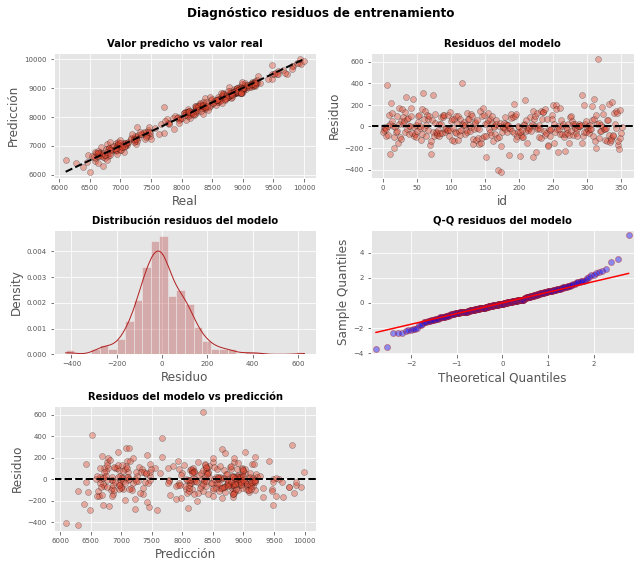

In [ ]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_real, y_pred_m, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_real))), residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_m, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los ejes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de entrenamiento', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [ ]:
#Test de Shapiro
shapiro_test = stats.shapiro(residuos)
shapiro_test

ShapiroResult(statistic=0.9646143317222595, pvalue=1.5756207005779288e-07)

In [ ]:
k2, p_value = stats.normaltest(residuos)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 43.602820629763166, p-value = 3.4022623760490916e-10


En vista a los resultados del análisis de normalidad, se puede determinar que los residuos tienen una distribución normal.

MAE
MAPE
MSE
RMSE

In [ ]:
#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_real, y_pred_m)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_real, y_pred_m)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_real, y_pred_m)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_real,y_pred_m)

print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

Resultado de las métricas:
MAE: 85.62
MAPE: 0.01
RMSE 116.86
R2: 0.98


#### Despliegue del modelo

In [ ]:
#Se genera un conjunto de datos
X_desp=X_train
y_desp=y_train

df_desp=pd.merge(X_desp[['^IBEX','dif']], y_desp, on='date')
df_desp=pd.merge(df_desp, df['flag'], on='date')
df_desp=pd.merge(df_desp, y_pred_m, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_desp['preddif']=round(df_desp['pred']-df_desp['^IBEX'],2)

#Se calculan las señales de compra
df_desp.loc[df_desp['preddif'] >= 0, 'predflag'] = 1 
df_desp.loc[df_desp['preddif'] < 0, 'predflag'] = 0
df_desp

,^IBEX,dif,futIBEX,flag,pred,preddif,predflag
date,,,,,,,
2020-03-25,6942.4,225.1,7033.2,1.0,6979.881040,37.48,1.0
2020-12-02,8220.8,80.0,8200.7,0.0,8200.117040,-20.68,0.0
2020-12-28,8155.6,44.1,8174.8,1.0,8144.690575,-10.91,0.0
2020-09-02,6996.9,40.0,7006.0,1.0,6995.683518,-1.22,0.0
2021-04-23,8618.6,-38.2,8701.9,1.0,8617.062914,-1.54,0.0
...,...,...,...,...,...,...,...
2020-06-02,7408.1,186.7,7626.4,1.0,7417.520251,9.42,1.0
2021-11-18,8903.2,-90.2,8753.2,0.0,8904.993838,1.79,1.0
2021-04-16,8613.5,41.9,8711.4,1.0,8602.536875,-10.96,0.0


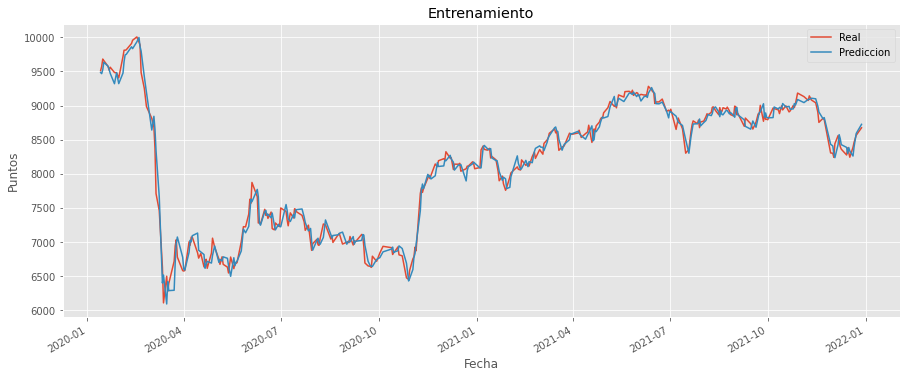

In [ ]:
#Gráfica de los valores reales y los predichos
df_desp[['futIBEX', 'pred']].plot(figsize=(15,6))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Entrenamiento');

Medición de los aciertos y fallos basados en el sistema de predicción

In [ ]:
y_true=df_desp['flag']
y_pred=df_desp['predflag']

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5892857142857143

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5681818181818182

### TEST

In [ ]:
#Se prepara el dataset de entrenamiento
X_tests

,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,,
2021-09-14,1.0,73.60,1.3838,15722.99,30670.10,8827.357143,-47.357143,-36.1,8780.0
2021-02-17,1.0,64.34,1.3888,13909.27,30292.19,8119.314286,3.385714,-31.0,8122.7
2021-07-12,1.0,75.16,1.3900,15790.51,28569.02,8846.900000,-30.200000,40.1,8816.7
2021-11-19,1.0,78.89,1.3500,16159.97,29745.87,9049.614286,-296.414286,-150.0,8753.2
2021-09-13,1.0,73.51,1.3841,15701.42,30447.37,8850.971429,-34.871429,120.8,8816.1
...,...,...,...,...,...,...,...,...,...
2020-05-22,1.0,35.13,1.2223,11073.87,20388.16,6630.000000,67.500000,11.4,6697.5
2020-08-13,1.0,44.96,1.3048,12993.71,23249.61,7083.300000,167.200000,-45.5,7250.5
2021-12-27,1.0,78.60,1.3404,15835.25,28676.46,8374.185714,247.914286,58.4,8622.1


In [ ]:
#Se realiza la predicción con el conjunto de test

######
X_exog_pred=X_tests
######

y_pred = modelres.predict(exog = X_exog_pred) #Predicciones
y_pred =pd.DataFrame(y_pred)
y_pred.columns = ['pred']
y_pred

,pred
date,
2021-09-14,8783.735061
2021-02-17,8167.775239
2021-07-12,8808.946508
2021-11-19,8749.276525
2021-09-13,8798.171090
...,...
2020-05-22,6726.440403
2020-08-13,7280.571391
2021-12-27,8660.043582


#### Análisis de residuos

In [ ]:
# Análisis de residuos

#####
y_pred_m = y_pred
y_real = y_test
#####

residuos=y_pred_m['pred'] - y_real['futIBEX']
residuos

date
2021-09-14    148.335061
2021-02-17    109.675239
2021-07-12    114.146508
2021-11-19    -72.023475
2021-09-13     18.171090
                 ...    
2020-05-22   -130.359597
2020-08-13    126.271391
2021-12-27    -28.856418
2021-11-10     51.798486
2021-12-10     57.300073
Length: 152, dtype: float64

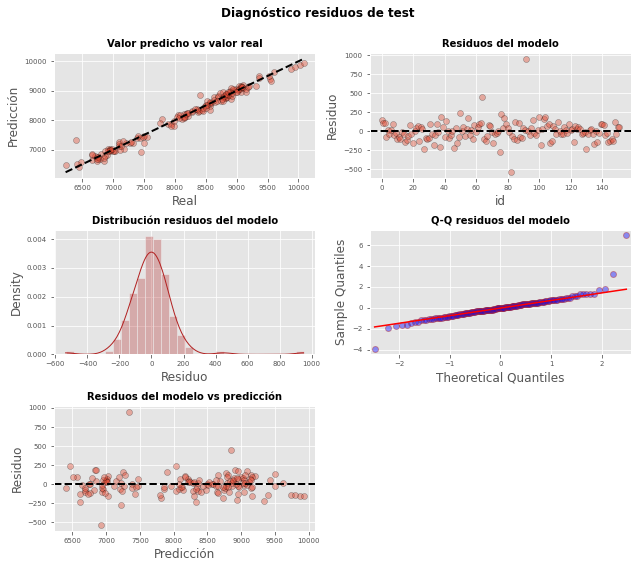

In [ ]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_real, y_pred_m, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_real))), residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_m, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los ejes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de test', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [ ]:
#Test de Shapiro
shapiro_test = stats.shapiro(residuos)
shapiro_test

ShapiroResult(statistic=0.8370277285575867, pvalue=1.0340467197778036e-11)

In [ ]:
k2, p_value = stats.normaltest(residuos)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 99.12129375369099, p-value = 2.9928471817792425e-22


En vista a los resultados del análisis de normalidad, se puede determinar que los residuos tienen una distribución normal.

MAE
MAPE
MSE
RMSE

In [ ]:
#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_real, y_pred_m)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_real, y_pred_m)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_real, y_pred_m)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_real,y_pred_m)

print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

Resultado de las métricas:
MAE: 89.97
MAPE: 0.01
RMSE 136.74
R2: 0.98


#### Despliegue del modelo

In [ ]:
#Se genera un conjunto de datos

#####
X_desp=X_test
y_desp=y_test
#####

df_desp=pd.merge(X_desp[['^IBEX','dif']], y_desp, on='date')
df_desp=pd.merge(df_desp, df['flag'], on='date')
df_desp=pd.merge(df_desp, y_pred_m, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_desp['preddif']=round(df_desp['pred']-df_desp['^IBEX'],2)

#Se calculan las señales de compra
df_desp.loc[df_desp['preddif'] >= 0, 'predflag'] = 1 
df_desp.loc[df_desp['preddif'] < 0, 'predflag'] = 0
df_desp

,^IBEX,dif,futIBEX,flag,pred,preddif,predflag
date,,,,,,,
2021-09-14,8780.0,-36.1,8635.4,0.0,8783.735061,3.74,1.0
2021-02-17,8122.7,-31.0,8058.1,0.0,8167.775239,45.08,1.0
2021-07-12,8816.7,40.1,8694.8,0.0,8808.946508,-7.75,0.0
2021-11-19,8753.2,-150.0,8821.3,1.0,8749.276525,-3.92,0.0
2021-09-13,8816.1,120.8,8780.0,0.0,8798.171090,-17.93,0.0
...,...,...,...,...,...,...,...
2020-05-22,6697.5,11.4,6856.8,1.0,6726.440403,28.94,1.0
2020-08-13,7250.5,-45.5,7154.3,0.0,7280.571391,30.07,1.0
2021-12-27,8622.1,58.4,8688.9,1.0,8660.043582,37.94,1.0


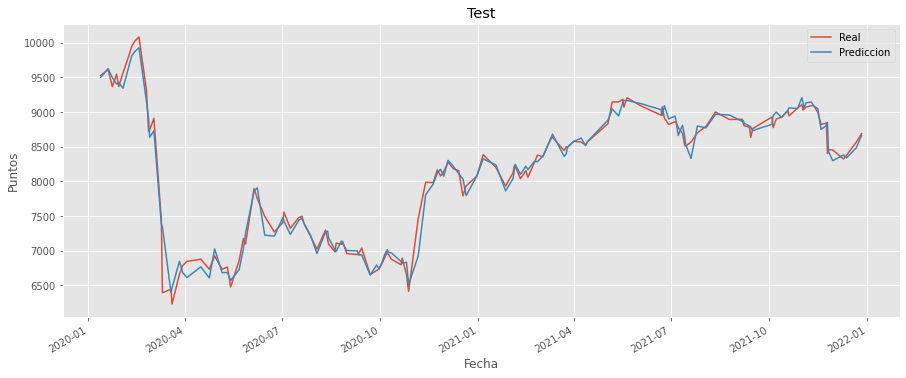

In [ ]:
#Gráfica de los valores reales y los predichos
df_desp[['futIBEX', 'pred']].plot(figsize=(15,6))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Test');

Medición de los aciertos y fallos basados en el sistema de predicción

In [ ]:
y_true=df_desp['flag']
y_pred=df_desp['predflag']

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5512820512820513

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.506578947368421

## Prueba del modelo predictivo para obtener beneficios

In [ ]:
df_t.columns.to_list()

['BZ=F',
 'GBPUSD=X',
 '^GDAXI',
 '^N225',
 'MA7',
 'difMA7',
 'dif',
 'flag',
 '^IBEX',
 'futIBEX']

In [ ]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=df_t.columns.to_list()
var_pruebas.remove('futIBEX')
var_pruebas.remove('flag')

#Se genera el conjunto de pruebas
df_pruebas=df[var_pruebas]

#Se añade la constante para statsmodels
df_pruebas=sm.add_constant(df_pruebas, prepend=True)

#Se añaden los datos reales para las señales de compra-venta
df_pruebas=pd.merge(df_pruebas, df[['flag', 'futIBEX']], on='date')

df_pruebas

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX
date,,,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3
2020-01-14,1.0,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7
2020-01-15,1.0,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5
2020-01-16,1.0,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3
2020-01-17,1.0,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1
2021-12-22,1.0,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7
2021-12-23,1.0,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7


In [ ]:
df_pruebas.iloc[:,0:9]

,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9
2020-01-14,1.0,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3
2020-01-15,1.0,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7
2020-01-16,1.0,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5
2020-01-17,1.0,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3
...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5
2021-12-22,1.0,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1
2021-12-23,1.0,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7


In [ ]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = round(modelres.predict(exog = df_pruebas.iloc[:,0:9]),2)
df_pruebas

,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX
date,,,,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9499.04
2020-01-14,1.0,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9483.88
2020-01-15,1.0,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9466.96
2020-01-16,1.0,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9525.36
2020-01-17,1.0,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9634.42
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8393.99
2021-12-22,1.0,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8481.78
2021-12-23,1.0,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8590.05


In [ ]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['futIBEX']),2)
df_pruebas

,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif
date,,,,,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9499.04,-29.26
2020-01-14,1.0,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9483.88,-27.82
2020-01-15,1.0,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9466.96,-105.54
2020-01-16,1.0,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9525.36,-155.94
2020-01-17,1.0,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9634.42,-24.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8393.99,-65.11
2021-12-22,1.0,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8481.78,-81.92
2021-12-23,1.0,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8590.05,26.35


In [ ]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

,const,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif,predflag
date,,,,,,,,,,,,,,
2020-01-13,1.0,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9499.04,-29.26,0.0
2020-01-14,1.0,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9483.88,-27.82,0.0
2020-01-15,1.0,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9466.96,-105.54,0.0
2020-01-16,1.0,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9525.36,-155.94,0.0
2020-01-17,1.0,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9634.42,-24.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8393.99,-65.11,0.0
2021-12-22,1.0,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8481.78,-81.92,0.0
2021-12-23,1.0,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8590.05,26.35,1.0


### Evaluación del rendimiento económico

In [ ]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [ ]:
#Cálculo del rendimiento de las operaciones
rend_total=0

for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
  
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: -188


En vista a los resultados, el modelo no es válido para obtener beneficios

# Regresión Lineal modelo 3

## Preparación de los datos
Al emplear "StatsModels" para realizar la regresión lineal, es necesario preparar los datos añadiendo una constante 1 para todas las filas

Para este modelo se tendrá en cuenta el resumen del modelo 1, donde se observa que puede ser conveniente retirar la variable cambio libra/dolar

In [ ]:
df_t=df[['BZ=F', 'difMA7', 'dif', '^IBEX','futIBEX','flag']]
df_t

,BZ=F,difMA7,dif,^IBEX,futIBEX,flag
date,,,,,,
2020-01-13,64.20,-65.428571,-29.7,9543.9,9528.3,0.0
2020-01-14,64.49,-59.985714,-15.6,9528.3,9511.7,0.0
2020-01-15,64.00,-59.685714,-16.6,9511.7,9572.5,1.0
2020-01-16,64.62,13.857143,60.8,9572.5,9681.3,1.0
2020-01-17,64.85,123.700000,108.8,9681.3,9658.8,0.0
...,...,...,...,...,...,...
2021-12-21,73.98,63.157143,145.1,8387.5,8459.1,1.0
2021-12-22,75.29,130.857143,71.6,8459.1,8563.7,1.0
2021-12-23,76.85,215.971429,104.6,8563.7,8563.7,1.0


###Creación de los conjuntos de datos para el entrenamiento y validación

In [ ]:
#Se generan los df para X e y
X=df_t.drop(['futIBEX','flag'], axis=1)
y=df_t[['futIBEX']]

In [ ]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Preparación de datos para el modelo

In [ ]:
# Preparación de datos para el modelo
X_trains = sm.add_constant(X_train, prepend=True)
X_trains

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,difMA7,dif,^IBEX
date,,,,,
2020-03-25,1.0,27.39,561.385714,225.1,6942.4
2020-12-02,1.0,48.25,106.214286,80.0,8220.8
2020-12-28,1.0,50.86,121.400000,44.1,8155.6
2020-09-02,1.0,44.43,-73.185714,40.0,6996.9
2021-04-23,1.0,66.11,29.900000,-38.2,8618.6
...,...,...,...,...,...
2020-06-02,1.0,39.57,368.857143,186.7,7408.1
2021-11-18,1.0,81.24,-170.942857,-90.2,8903.2
2021-04-16,1.0,66.77,39.400000,41.9,8613.5


In [ ]:
# Preparación de datos para el modelo
X_tests = sm.add_constant(X_test, prepend=True)
X_tests

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,difMA7,dif,^IBEX
date,,,,,
2021-09-14,1.0,73.60,-47.357143,-36.1,8780.0
2021-02-17,1.0,64.34,3.385714,-31.0,8122.7
2021-07-12,1.0,75.16,-30.200000,40.1,8816.7
2021-11-19,1.0,78.89,-296.414286,-150.0,8753.2
2021-09-13,1.0,73.51,-34.871429,120.8,8816.1
...,...,...,...,...,...
2020-05-22,1.0,35.13,67.500000,11.4,6697.5
2020-08-13,1.0,44.96,167.200000,-45.5,7250.5
2021-12-27,1.0,78.60,247.914286,58.4,8622.1


## Entrenamiento del modelo de regresión lineal

In [ ]:
#Creación del modelo de regresión lineal

###
y_endog=y_train
X_exog=X_trains
###

modelo = sm.OLS(endog=y_endog, exog=X_exog)

# Ajuste del modelo
modelres = modelo.fit()

# Resumen del modelo
print(modelres.summary())

                            OLS Regression Results                            
Dep. Variable:                futIBEX   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5320.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          7.27e-310
Time:                        23:22:56   Log-Likelihood:                -2176.7
No. Observations:                 352   AIC:                             4363.
Df Residuals:                     347   BIC:                             4383.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.5007     72.775      3.525      0.0

## Predicción

### TRAIN

In [ ]:
#Se prepara el dataset de entrenamiento
X_trains

,const,BZ=F,difMA7,dif,^IBEX
date,,,,,
2020-03-25,1.0,27.39,561.385714,225.1,6942.4
2020-12-02,1.0,48.25,106.214286,80.0,8220.8
2020-12-28,1.0,50.86,121.400000,44.1,8155.6
2020-09-02,1.0,44.43,-73.185714,40.0,6996.9
2021-04-23,1.0,66.11,29.900000,-38.2,8618.6
...,...,...,...,...,...
2020-06-02,1.0,39.57,368.857143,186.7,7408.1
2021-11-18,1.0,81.24,-170.942857,-90.2,8903.2
2021-04-16,1.0,66.77,39.400000,41.9,8613.5


In [ ]:
#Se realiza la predicción con el conjunto de entrenamiento

#####
X_exog_pred=X_trains
#####

y_pred = modelres.predict(exog = X_exog_pred) #Predicciones
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['pred']
y_pred

,pred
date,
2020-03-25,6957.385904
2020-12-02,8196.178594
2020-12-28,8146.053998
2020-09-02,7009.215778
2021-04-23,8622.689170
...,...
2020-06-02,7414.086585
2021-11-18,8914.244570
2021-04-16,8609.418850


#### Análisis de residuos

In [ ]:
# Análisis de residuos
y_pred_m=y_pred
y_real=y_train

residuos=y_pred_m['pred'] - y_real['futIBEX']
residuos

date
2020-03-25    -75.814096
2020-12-02     -4.521406
2020-12-28    -28.746002
2020-09-02      3.215778
2021-04-23    -79.210830
                 ...    
2020-06-02   -212.313415
2021-11-18    161.044570
2021-04-16   -101.981150
2021-07-09    -55.449252
2021-06-16     -1.907075
Length: 352, dtype: float64

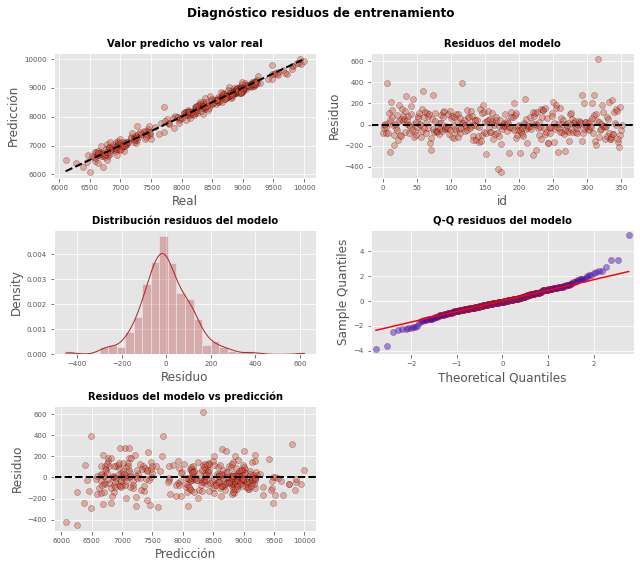

In [ ]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_real, y_pred_m, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_real))), residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_m, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los ejes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de entrenamiento', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [ ]:
#Test de Shapiro
shapiro_test = stats.shapiro(residuos)
shapiro_test

ShapiroResult(statistic=0.9649619460105896, pvalue=1.7825843201535463e-07)

In [ ]:
k2, p_value = stats.normaltest(residuos)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 39.3467901832059, p-value = 2.8572817772194174e-09


En vista a los resultados del análisis de normalidad, se puede determinar que los residuos tienen una distribución normal.

MAE
MAPE
MSE
RMSE

In [ ]:
#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_real, y_pred_m)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_real, y_pred_m)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_real, y_pred_m)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_real,y_pred_m)

print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

Resultado de las métricas:
MAE: 85.74
MAPE: 0.01
RMSE 117.3
R2: 0.98


#### Despliegue del modelo

In [ ]:
#Se genera un conjunto de datos
X_desp=X_train
y_desp=y_train

df_desp=pd.merge(X_desp[['^IBEX','dif']], y_desp, on='date')
df_desp=pd.merge(df_desp, df['flag'], on='date')
df_desp=pd.merge(df_desp, y_pred_m, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_desp['preddif']=round(df_desp['pred']-df_desp['^IBEX'],2)

#Se calculan las señales de compra
df_desp.loc[df_desp['preddif'] >= 0, 'predflag'] = 1 
df_desp.loc[df_desp['preddif'] < 0, 'predflag'] = 0
df_desp

,^IBEX,dif,futIBEX,flag,pred,preddif,predflag
date,,,,,,,
2020-03-25,6942.4,225.1,7033.2,1.0,6957.385904,14.99,1.0
2020-12-02,8220.8,80.0,8200.7,0.0,8196.178594,-24.62,0.0
2020-12-28,8155.6,44.1,8174.8,1.0,8146.053998,-9.55,0.0
2020-09-02,6996.9,40.0,7006.0,1.0,7009.215778,12.32,1.0
2021-04-23,8618.6,-38.2,8701.9,1.0,8622.689170,4.09,1.0
...,...,...,...,...,...,...,...
2020-06-02,7408.1,186.7,7626.4,1.0,7414.086585,5.99,1.0
2021-11-18,8903.2,-90.2,8753.2,0.0,8914.244570,11.04,1.0
2021-04-16,8613.5,41.9,8711.4,1.0,8609.418850,-4.08,0.0


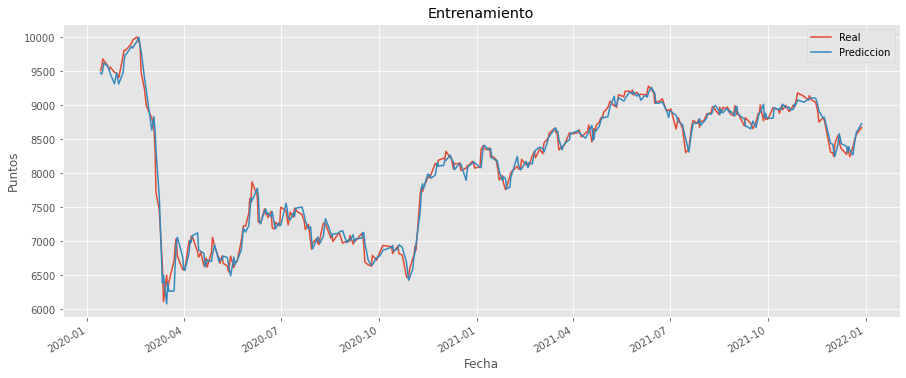

In [ ]:
#Gráfica de los valores reales y los predichos
df_desp[['futIBEX', 'pred']].plot(figsize=(15,6))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Entrenamiento');

Medición de los aciertos y fallos basados en el sistema de predicción

In [ ]:
y_true=df_desp['flag']
y_pred=df_desp['predflag']

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5578947368421052

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5454545454545454

### TEST

In [ ]:
#Se prepara el dataset de entrenamiento
X_tests

,const,BZ=F,difMA7,dif,^IBEX
date,,,,,
2021-09-14,1.0,73.60,-47.357143,-36.1,8780.0
2021-02-17,1.0,64.34,3.385714,-31.0,8122.7
2021-07-12,1.0,75.16,-30.200000,40.1,8816.7
2021-11-19,1.0,78.89,-296.414286,-150.0,8753.2
2021-09-13,1.0,73.51,-34.871429,120.8,8816.1
...,...,...,...,...,...
2020-05-22,1.0,35.13,67.500000,11.4,6697.5
2020-08-13,1.0,44.96,167.200000,-45.5,7250.5
2021-12-27,1.0,78.60,247.914286,58.4,8622.1


In [ ]:
#Se realiza la predicción con el conjunto de test

######
X_exog_pred=X_tests
######

y_pred = modelres.predict(exog = X_exog_pred) #Predicciones
y_pred =pd.DataFrame(y_pred)
y_pred.columns = ['pred']
y_pred

,pred
date,
2021-09-14,8784.994788
2021-02-17,8142.645983
2021-07-12,8814.800405
2021-11-19,8761.912336
2021-09-13,8799.309846
...,...
2020-05-22,6721.225153
2020-08-13,7287.132048
2021-12-27,8661.638126


#### Análisis de residuos

In [ ]:
# Análisis de residuos

#####
y_pred_m = y_pred
y_real = y_test
#####

residuos=y_pred_m['pred'] - y_real['futIBEX']
residuos

date
2021-09-14    149.594788
2021-02-17     84.545983
2021-07-12    120.000405
2021-11-19    -59.387664
2021-09-13     19.309846
                 ...    
2020-05-22   -135.574847
2020-08-13    132.832048
2021-12-27    -27.261874
2021-11-10     53.115014
2021-12-10     65.760988
Length: 152, dtype: float64

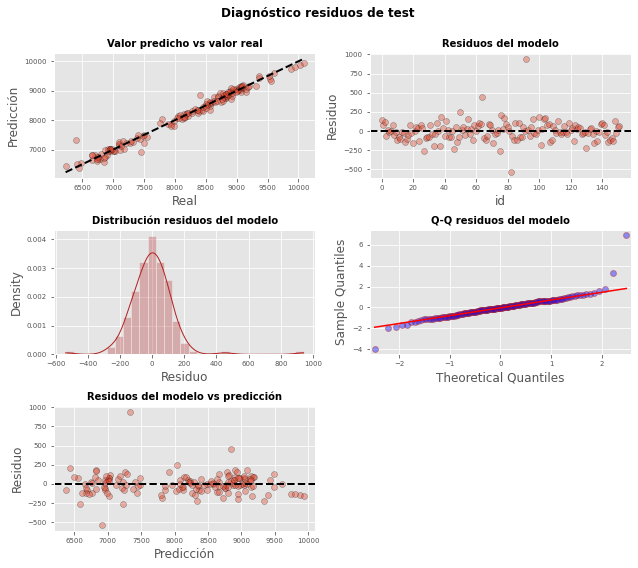

In [ ]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_real, y_pred_m, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_real))), residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_m, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los ejes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de test', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [ ]:
#Test de Shapiro
shapiro_test = stats.shapiro(residuos)
shapiro_test

ShapiroResult(statistic=0.838210940361023, pvalue=1.1577595653011752e-11)

In [ ]:
k2, p_value = stats.normaltest(residuos)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 96.86344386164572, p-value = 9.25487199517168e-22


En vista a los resultados del análisis de normalidad, se puede determinar que los residuos tienen una distribución normal.

MAE
MAPE
MSE
RMSE

In [ ]:
#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_real, y_pred_m)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_real, y_pred_m)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_real, y_pred_m)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_real,y_pred_m)

print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

Resultado de las métricas:
MAE: 89.92
MAPE: 0.01
RMSE 136.33
R2: 0.98


#### Despliegue del modelo

In [ ]:
#Se genera un conjunto de datos

#####
X_desp=X_test
y_desp=y_test
#####

df_desp=pd.merge(X_desp[['^IBEX','dif']], y_desp, on='date')
df_desp=pd.merge(df_desp, df['flag'], on='date')
df_desp=pd.merge(df_desp, y_pred_m, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_desp['preddif']=round(df_desp['pred']-df_desp['^IBEX'],2)

#Se calculan las señales de compra
df_desp.loc[df_desp['preddif'] >= 0, 'predflag'] = 1 
df_desp.loc[df_desp['preddif'] < 0, 'predflag'] = 0
df_desp

,^IBEX,dif,futIBEX,flag,pred,preddif,predflag
date,,,,,,,
2021-09-14,8780.0,-36.1,8635.4,0.0,8784.994788,4.99,1.0
2021-02-17,8122.7,-31.0,8058.1,0.0,8142.645983,19.95,1.0
2021-07-12,8816.7,40.1,8694.8,0.0,8814.800405,-1.90,0.0
2021-11-19,8753.2,-150.0,8821.3,1.0,8761.912336,8.71,1.0
2021-09-13,8816.1,120.8,8780.0,0.0,8799.309846,-16.79,0.0
...,...,...,...,...,...,...,...
2020-05-22,6697.5,11.4,6856.8,1.0,6721.225153,23.73,1.0
2020-08-13,7250.5,-45.5,7154.3,0.0,7287.132048,36.63,1.0
2021-12-27,8622.1,58.4,8688.9,1.0,8661.638126,39.54,1.0


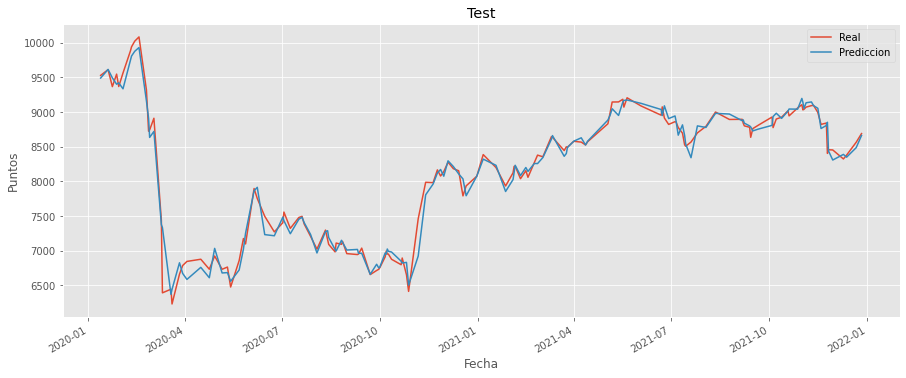

In [ ]:
#Gráfica de los valores reales y los predichos
df_desp[['futIBEX', 'pred']].plot(figsize=(15,6))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Test');

Medición de los aciertos y fallos basados en el sistema de predicción

In [ ]:
y_true=df_desp['flag']
y_pred=df_desp['predflag']

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5795454545454546

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5460526315789473

## Prueba del modelo predictivo para obtener beneficios

In [ ]:
df_t.columns.to_list()

['BZ=F', 'difMA7', 'dif', '^IBEX', 'futIBEX', 'flag']

In [ ]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=df_t.columns.to_list()
var_pruebas.remove('futIBEX')
var_pruebas.remove('flag')

#Se genera el conjunto de pruebas
df_pruebas=df[var_pruebas]

#Se añade la constante para statsmodels
df_pruebas=sm.add_constant(df_pruebas, prepend=True)

#Se añaden los datos reales para las señales de compra-venta
df_pruebas=pd.merge(df_pruebas, df[['flag', 'futIBEX']], on='date')

df_pruebas

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,BZ=F,difMA7,dif,^IBEX,flag,futIBEX
date,,,,,,,
2020-01-13,1.0,64.20,-65.428571,-29.7,9543.9,0.0,9528.3
2020-01-14,1.0,64.49,-59.985714,-15.6,9528.3,0.0,9511.7
2020-01-15,1.0,64.00,-59.685714,-16.6,9511.7,1.0,9572.5
2020-01-16,1.0,64.62,13.857143,60.8,9572.5,1.0,9681.3
2020-01-17,1.0,64.85,123.700000,108.8,9681.3,0.0,9658.8
...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,63.157143,145.1,8387.5,1.0,8459.1
2021-12-22,1.0,75.29,130.857143,71.6,8459.1,1.0,8563.7
2021-12-23,1.0,76.85,215.971429,104.6,8563.7,1.0,8563.7


In [ ]:
columnas=5
df_pruebas.iloc[:,0:columnas]

,const,BZ=F,difMA7,dif,^IBEX
date,,,,,
2020-01-13,1.0,64.20,-65.428571,-29.7,9543.9
2020-01-14,1.0,64.49,-59.985714,-15.6,9528.3
2020-01-15,1.0,64.00,-59.685714,-16.6,9511.7
2020-01-16,1.0,64.62,13.857143,60.8,9572.5
2020-01-17,1.0,64.85,123.700000,108.8,9681.3
...,...,...,...,...,...
2021-12-21,1.0,73.98,63.157143,145.1,8387.5
2021-12-22,1.0,75.29,130.857143,71.6,8459.1
2021-12-23,1.0,76.85,215.971429,104.6,8563.7


In [ ]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = round(modelres.predict(exog = df_pruebas.iloc[:,0:columnas]),2)
df_pruebas

,const,BZ=F,difMA7,dif,^IBEX,flag,futIBEX,predIBEX
date,,,,,,,,
2020-01-13,1.0,64.20,-65.428571,-29.7,9543.9,0.0,9528.3,9489.89
2020-01-14,1.0,64.49,-59.985714,-15.6,9528.3,0.0,9511.7,9474.29
2020-01-15,1.0,64.00,-59.685714,-16.6,9511.7,1.0,9572.5,9457.56
2020-01-16,1.0,64.62,13.857143,60.8,9572.5,1.0,9681.3,9513.65
2020-01-17,1.0,64.85,123.700000,108.8,9681.3,0.0,9658.8,9622.15
...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,63.157143,145.1,8387.5,1.0,8459.1,8398.20
2021-12-22,1.0,75.29,130.857143,71.6,8459.1,1.0,8563.7,8485.82
2021-12-23,1.0,76.85,215.971429,104.6,8563.7,1.0,8563.7,8592.81


In [ ]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['futIBEX']),2)
df_pruebas

,const,BZ=F,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif
date,,,,,,,,,
2020-01-13,1.0,64.20,-65.428571,-29.7,9543.9,0.0,9528.3,9489.89,-38.41
2020-01-14,1.0,64.49,-59.985714,-15.6,9528.3,0.0,9511.7,9474.29,-37.41
2020-01-15,1.0,64.00,-59.685714,-16.6,9511.7,1.0,9572.5,9457.56,-114.94
2020-01-16,1.0,64.62,13.857143,60.8,9572.5,1.0,9681.3,9513.65,-167.65
2020-01-17,1.0,64.85,123.700000,108.8,9681.3,0.0,9658.8,9622.15,-36.65
...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,63.157143,145.1,8387.5,1.0,8459.1,8398.20,-60.90
2021-12-22,1.0,75.29,130.857143,71.6,8459.1,1.0,8563.7,8485.82,-77.88
2021-12-23,1.0,76.85,215.971429,104.6,8563.7,1.0,8563.7,8592.81,29.11


In [ ]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

,const,BZ=F,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif,predflag
date,,,,,,,,,,
2020-01-13,1.0,64.20,-65.428571,-29.7,9543.9,0.0,9528.3,9489.89,-38.41,0.0
2020-01-14,1.0,64.49,-59.985714,-15.6,9528.3,0.0,9511.7,9474.29,-37.41,0.0
2020-01-15,1.0,64.00,-59.685714,-16.6,9511.7,1.0,9572.5,9457.56,-114.94,0.0
2020-01-16,1.0,64.62,13.857143,60.8,9572.5,1.0,9681.3,9513.65,-167.65,0.0
2020-01-17,1.0,64.85,123.700000,108.8,9681.3,0.0,9658.8,9622.15,-36.65,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,1.0,73.98,63.157143,145.1,8387.5,1.0,8459.1,8398.20,-60.90,0.0
2021-12-22,1.0,75.29,130.857143,71.6,8459.1,1.0,8563.7,8485.82,-77.88,0.0
2021-12-23,1.0,76.85,215.971429,104.6,8563.7,1.0,8563.7,8592.81,29.11,1.0


### Evaluación del rendimiento económico

In [ ]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [ ]:
#Cálculo del rendimiento de las operaciones
rend_total=0

for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
  
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: -193


En vista a los resultados, el modelo no es válido para obtener beneficios